In [ ]:
from google.colab import drive
from bs4 import BeautifulSoup
import requests

!pip install scikit-learn
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

import seaborn as sns
!pip install xgboost
import xgboost as xgb
!pip install vadersentiment
!pip install textblob

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import lightgbm as lgb
from lightgbm import LGBMClassifier

import os

import torch
from transformers import BertTokenizer, BertModel
import pandas as pd

!pip install sentence_transformers
!pip install pandas nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import sentence_transformers
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec

import numpy as np
import matplotlib.pyplot as grf
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

url = 'https://markets.businessinsider.com/news/meta-stock'
bh=[]
for i in range(1,320) :#https://markets.businessinsider.com/news/meta-stock?p=325
  url2=url+'?p='+str(i)
  res = requests.get(url2)
  html = res.text
  soup = BeautifulSoup(html,'lxml')
  columns = ['datetime','title']
  df=pd.DataFrame(columns=columns)
  articles= soup.find_all('div',class_='latest-news__story')

  for article in articles:
    datetime = article.find('time',class_='latest-news__date').get('datetime')
    title = article.find('a',class_='news-link').text
    bh.append([datetime,title])
    df=pd.DataFrame(bh,columns=df.columns)
df['date'] = pd.to_datetime(df['datetime']).dt.date
drive.mount('drive', force_remount = True)
df.to_csv('dfmeta.csv')
!cp dfmeta.csv "drive/My Drive/"

<ipython-input-3-7363d84dc2c0>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['datetime']).dt.date


Mounted at drive


In [ ]:
bl = pd.read_csv('dfmeta.csv')
df2 = bl.groupby('date')['title'].apply(''.join).reset_index()

In [ ]:
#This is written for tokenising and cleaning new title of Apple Stock

lemmatizer = WordNetLemmatizer()
def clean_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    #It removes all all stop words from news title

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)
#Formation of a new column for cleaned title text which has final outcome of cleaning

df2['cleaned_title'] = df2['title'].apply(clean_text)
print(df2)

            date                                              title  \
0     2017-02-06  Apple, Facebook, Snapchat, and Twitter have le...   
1     2017-02-08  Facebook Extends Generous Bereavement Leave Fa...   
2     2017-02-09  Facebook hired an MTV executive to help it cre...   
3     2017-02-10  Facebook has agreed to be independently audite...   
4     2017-02-14  Like it or not, Facebook is going to start aut...   
...          ...                                                ...   
2403  2024-06-15  Meta says it won't release its AI assistant in...   
2404  2024-06-16  We asked Meta AI how to disable it and it pret...   
2405  2024-06-17  Get ready to see AI clones of influencers in y...   
2406  2024-06-18  3 Bargain Stocks to Buy Now: June 20243 Tech S...   
2407  2024-06-19  Rag to Riches: 3 AR Stocks That Could Make Ear...   

                                          cleaned_title  
0     apple facebook snapchat twitter legally oppose...  
1     facebook extends generous

In [ ]:
#Below code is for transforming textual cleaned title text into vector by running it on Word2vec

sentences = df2['cleaned_title'].apply(lambda x: x.split()).tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
#Defining of word2vec function for transformation

def word2vec(words, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    nwords = 0
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            nwords += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if nwords > 0:
        feature_vec = np.divide(feature_vec, nwords)
    return feature_vec
num_features = 100
#Added column named features which has vectors obtained via above defined function

df2['Word2Vec_Features'] = df2['cleaned_title'].apply(lambda x: word2vec(x, model, num_features))
print(df2[['title', 'Word2Vec_Features']])

                                                  title  \
0     Apple, Facebook, Snapchat, and Twitter have le...   
1     Facebook Extends Generous Bereavement Leave Fa...   
2     Facebook hired an MTV executive to help it cre...   
3     Facebook has agreed to be independently audite...   
4     Like it or not, Facebook is going to start aut...   
...                                                 ...   
2403  Meta says it won't release its AI assistant in...   
2404  We asked Meta AI how to disable it and it pret...   
2405  Get ready to see AI clones of influencers in y...   
2406  3 Bargain Stocks to Buy Now: June 20243 Tech S...   
2407  Rag to Riches: 3 AR Stocks That Could Make Ear...   

                                      Word2Vec_Features  
0     [-0.1201061, 0.09686201, 0.048623815, 0.085623...  
1     [-0.06273582, 0.053705003, 0.025931615, 0.0497...  
2     [-0.07668759, 0.064656906, 0.032156695, 0.0586...  
3     [-0.08309092, 0.06906986, 0.034888055, 0.06419...  
4

In [ ]:
#It is important to set hugging face token as an Environment Variable
#below is code for it (authenticating access to Hugging Face Model)

os.environ['HF_TOKEN'] = 'collab'
#Defining a function to add more feature with the help of FinBERT model

def FinBERT_Feature(text, model, tokenizer):
    #Transforms text into tensors (tokenize)

    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    feature_vector = last_hidden_state.mean(dim=1).cpu().numpy().flatten()
    return feature_vector
finbert_model = BertModel.from_pretrained('yiyanghkust/finbert-tone')
finbert_tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
#Adding column to save FinBERT feature extracted from cleaned title text

df2['FinBERT_Features'] = df2['cleaned_title'].apply(lambda text: FinBERT_Feature(text, finbert_model, finbert_tokenizer))
finbert_feature = pd.DataFrame(df2['FinBERT_Features'].to_list(), columns=[f'FinBERT_{i}' for i in range(len(df2['FinBERT_Features'][0]))])
word2vec_feature = pd.DataFrame(df2['Word2Vec_Features'].to_list(), columns=[f'Word2Vec_{i}' for i in range(len(df2['Word2Vec_Features'][0]))])
final_data4 = pd.concat([df2, finbert_feature, word2vec_feature], axis=1)
final_data4.drop(['FinBERT_Features', 'Word2Vec_Features'], axis=1, inplace=True)
print(final_data4)

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

            date                                              title  \
0     2017-02-06  Apple, Facebook, Snapchat, and Twitter have le...   
1     2017-02-08  Facebook Extends Generous Bereavement Leave Fa...   
2     2017-02-09  Facebook hired an MTV executive to help it cre...   
3     2017-02-10  Facebook has agreed to be independently audite...   
4     2017-02-14  Like it or not, Facebook is going to start aut...   
...          ...                                                ...   
2403  2024-06-15  Meta says it won't release its AI assistant in...   
2404  2024-06-16  We asked Meta AI how to disable it and it pret...   
2405  2024-06-17  Get ready to see AI clones of influencers in y...   
2406  2024-06-18  3 Bargain Stocks to Buy Now: June 20243 Tech S...   
2407  2024-06-19  Rag to Riches: 3 AR Stocks That Could Make Ear...   

                                          cleaned_title  FinBERT_0  FinBERT_1  \
0     apple facebook snapchat twitter legally oppose...   0.537881

In [ ]:
#Finding subjectivity and polarity using textblob and vader for sentiment analysis on news title

final_data4 ['Subjectivity'] = final_data4 ['cleaned_title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
final_data4 ['Polarity'] = final_data4 ['cleaned_title'].apply(lambda x: TextBlob(x).sentiment.polarity)

sid = SentimentIntensityAnalyzer()
#Defining a function for sentiment Score

def get_sentiment_scores(text):
    return sid.polarity_scores(text)
sentiment_scores = final_data4['cleaned_title'].apply(get_sentiment_scores)
#Added 4 columns in csv for Sentiment Analysis using Vader

final_data4 ['negative'] = sentiment_scores.apply(lambda x: x['neg'])
final_data4 ['positive'] = sentiment_scores.apply(lambda x: x['pos'])
final_data4 ['neutral'] = sentiment_scores.apply(lambda x: x['neu'])
final_data4 ['compound'] = sentiment_scores.apply(lambda x: x['compound'])

#Saving all the creations made into new file df2 which is saved to drive

drive.mount('drive', force_remount = True)
final_data4.to_csv('comp3.csv')
!cp comp3.csv "drive/My Drive/"
final_data4.head(50)

Mounted at drive


,date,title,cleaned_title,FinBERT_0,FinBERT_1,FinBERT_2,FinBERT_3,FinBERT_4,FinBERT_5,FinBERT_6,...,Word2Vec_96,Word2Vec_97,Word2Vec_98,Word2Vec_99,Subjectivity,Polarity,negative,positive,neutral,compound
0,2017-02-06,"Apple, Facebook, Snapchat, and Twitter have le...",apple facebook snapchat twitter legally oppose...,0.537881,-1.145356,0.013602,0.737697,1.205776,-1.756483,0.746662,...,0.041991,-0.192847,-0.038188,-0.029828,0.200000,0.200000,0.212,0.082,0.706,-0.4939
1,2017-02-08,Facebook Extends Generous Bereavement Leave Fa...,facebook extends generous bereavement leave fa...,-0.178177,0.025983,-0.496027,0.716731,0.546151,-0.668425,-0.051190,...,0.024193,-0.096531,-0.025272,-0.010964,0.454545,0.136364,0.256,0.289,0.455,-0.0000
2,2017-02-09,Facebook hired an MTV executive to help it cre...,facebook hired mtv executive help create origi...,0.526320,-1.046848,0.055805,0.973695,1.047673,-0.970891,0.087245,...,0.028752,-0.117020,-0.034701,-0.015492,0.421429,0.434524,0.000,0.320,0.680,0.8834
3,2017-02-10,Facebook has agreed to be independently audite...,facebook agreed independently audited overstat...,0.266758,0.396534,0.099605,0.272816,1.130946,-1.051868,0.244064,...,0.031528,-0.128332,-0.033332,-0.017874,0.125000,0.000000,0.000,0.139,0.861,0.2732
4,2017-02-14,"Like it or not, Facebook is going to start aut...",like facebook going start autoplaying video so...,-0.491706,-0.198310,-0.296802,1.388625,0.235997,-0.328830,-0.226890,...,0.037216,-0.160274,-0.044633,-0.022420,0.400000,0.400000,0.000,0.161,0.839,0.3612
5,2017-02-15,Facebook is taking on LinkedIn by letting busi...,facebook taking linkedin letting business post...,0.152410,-0.814176,-0.247818,0.747257,0.707566,-1.398532,0.109567,...,0.027862,-0.105784,-0.037724,-0.014677,0.000000,0.000000,0.000,0.000,1.000,0.0000
6,2017-02-16,"Mark Zuckerberg wrote a nearly 6,000-word lett...",mark zuckerberg wrote nearly letter future fac...,-0.516534,-0.585916,0.360549,0.652315,0.488350,-0.338559,-0.118026,...,0.027324,-0.116803,-0.029258,-0.017413,0.456250,0.050000,0.000,0.000,1.000,0.0000
7,2017-02-17,Why Facebook removed a line about monitoring t...,facebook removed line monitoring terrorist cha...,0.620652,-0.240630,0.193244,0.973943,0.565542,-0.451685,0.287908,...,0.020790,-0.077784,-0.027078,-0.009297,0.000000,0.000000,0.289,0.000,0.711,-0.7269
8,2017-02-20,Snap bets on hardware as Facebook threat looms,snap bet hardware facebook threat loom,0.503242,0.329301,0.266516,0.705194,-0.079392,0.803453,-0.153609,...,0.016614,-0.074051,-0.014824,-0.010559,0.000000,0.000000,0.570,0.000,0.430,-0.6486
9,2017-02-21,TransferWise now lets you send money abroad us...,transferwise let send money abroad using faceb...,0.173795,-0.794971,-0.728941,1.470765,1.039239,-0.946913,0.085398,...,0.019672,-0.075784,-0.023052,-0.010588,0.000000,0.000000,0.000,0.000,1.000,0.0000


In [ ]:
fpath = 'drive/MyDrive/META_data.csv'
f2path = 'drive/MyDrive/comp3.csv'
k1 = pd.read_csv(fpath)
k2 = pd.read_csv(f2path)
k1['date'] = pd.to_datetime(k1['date'])
k2['date'] = pd.to_datetime(k2['date'])
merged_df = pd.merge(k2, k1, on='date')

merged_path = 'drive/MyDrive/comp3merge.csv'
merged_df.to_csv(merged_path, index=False)
merged_df.head()

<ipython-input-9-9fc54b69dd74>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  k1['date'] = pd.to_datetime(k1['date'])


,Unnamed: 0,date,title,cleaned_title,FinBERT_0,FinBERT_1,FinBERT_2,FinBERT_3,FinBERT_4,FinBERT_5,...,neutral,compound,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Label
0,0,2017-02-06,"Apple, Facebook, Snapchat, and Twitter have le...",apple facebook snapchat twitter legally oppose...,0.537881,-1.145356,0.013602,0.737697,1.205777,-1.756483,...,0.706,-0.4939,130.979996,132.059998,130.300003,132.059998,131.920029,17058500,NaN,1
1,1,2017-02-08,Facebook Extends Generous Bereavement Leave Fa...,facebook extends generous bereavement leave fa...,-0.178177,0.025983,-0.496027,0.716731,0.546151,-0.668425,...,0.455,-0.0000,132.600006,134.440002,132.440002,134.199997,134.057755,22390600,NaN,1
2,2,2017-02-09,Facebook hired an MTV executive to help it cre...,facebook hired mtv executive help create origi...,0.526320,-1.046848,0.055805,0.973695,1.047673,-0.970891,...,0.680,0.8834,134.490005,134.500000,133.309998,134.139999,133.997833,16470600,NaN,0
3,3,2017-02-10,Facebook has agreed to be independently audite...,facebook agreed independently audited overstat...,0.266758,0.396534,0.099605,0.272816,1.130946,-1.051868,...,0.861,0.2732,134.100006,134.940002,133.679993,134.190002,134.047775,15061900,NaN,1
4,4,2017-02-14,"Like it or not, Facebook is going to start aut...",like facebook going start autoplaying video so...,-0.491706,-0.198310,-0.296802,1.388625,0.235997,-0.328830,...,0.839,0.3612,134.100006,134.229996,132.550003,133.850006,133.708145,14364900,NaN,0


In [ ]:
#Here i am selecting specific column oF Okbhai.csv to create new dataframe
#Below are two newly created Dataframe

merged_df2=merged_df.drop(columns=['High','Low','Close','cleaned_title','title','date','Unnamed: 7','Unnamed: 0'])
merged_df1=merged_df[['Open','High','Low','Close','Volume','Polarity','Subjectivity','negative','positive','neutral','Label']]
print(merged_df2)

      FinBERT_0  FinBERT_1  FinBERT_2  FinBERT_3  FinBERT_4  FinBERT_5  \
0      0.537881  -1.145356   0.013602   0.737697   1.205777  -1.756483   
1     -0.178177   0.025983  -0.496027   0.716731   0.546151  -0.668425   
2      0.526320  -1.046848   0.055805   0.973695   1.047673  -0.970891   
3      0.266758   0.396534   0.099605   0.272816   1.130946  -1.051868   
4     -0.491706  -0.198310  -0.296802   1.388625   0.235997  -0.328830   
...         ...        ...        ...        ...        ...        ...   
1813  -0.271993  -0.182458   0.754773   0.909030   0.603741  -0.004279   
1814   0.323660  -0.027697   1.145828   0.564603   0.819849   0.699177   
1815   0.063833  -0.550163   1.013266   0.097380   1.107359   1.013495   
1816   0.375384  -0.353148   1.110424   1.005629   0.480102  -0.107851   
1817   0.107875  -0.129750   0.883012   0.768308   1.127737  -0.368750   

      FinBERT_6  FinBERT_7  FinBERT_8  FinBERT_9  ...  Subjectivity  Polarity  \
0      0.746662   0.246284  -0

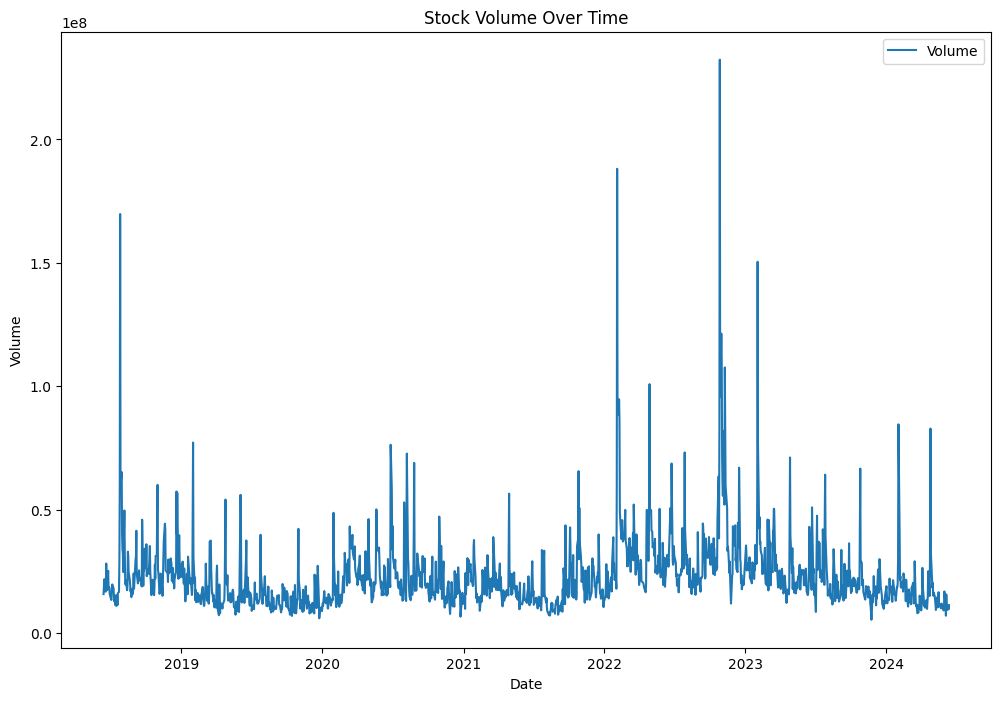

In [ ]:
#Here i have written the code to obtain graph of Stock Volume Over Time
#On X axis we have date and on Y axis we have Volume of Apple Stock for that date

subset_df = merged_df.tail(1500)
grf.figure(figsize=(12, 8))
grf.plot(subset_df['date'], subset_df['Volume'], label='Volume')
grf.title('Stock Volume Over Time')
grf.xlabel('Date')
grf.ylabel('Volume')
grf.legend()
grf.show()

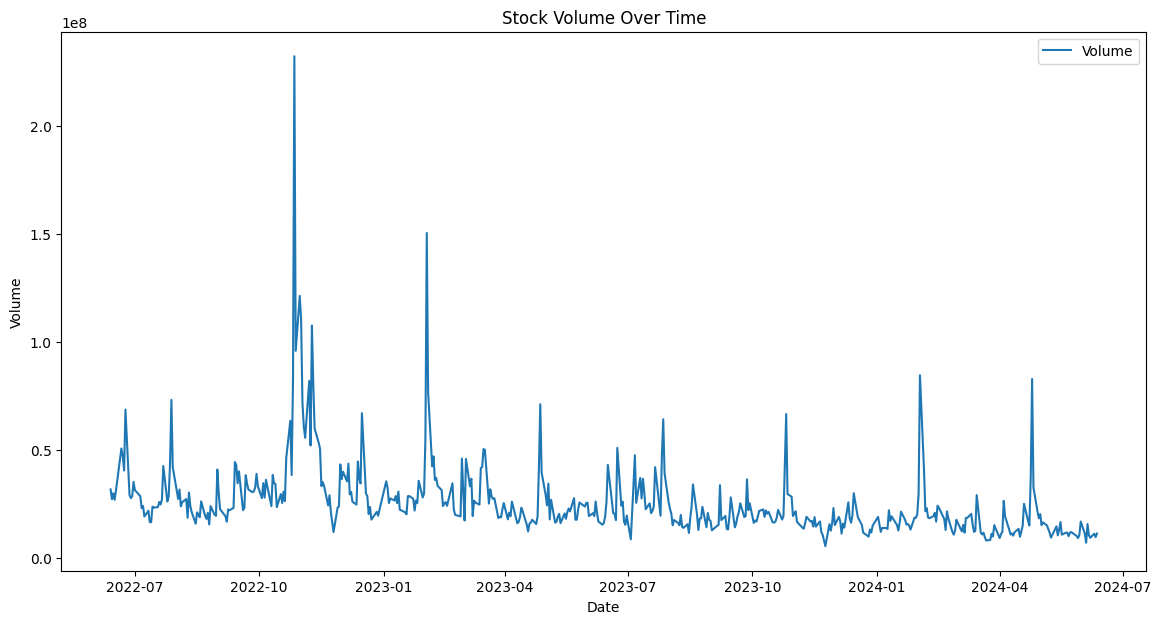

In [ ]:
subset_df = merged_df.tail(500)
grf.figure(figsize=(14, 7))
grf.plot(subset_df['date'], subset_df['Volume'], label='Volume')
grf.title('Stock Volume Over Time')
grf.xlabel('Date')
grf.ylabel('Volume')
grf.legend()
grf.show()

In [ ]:
                                        #NOTE#

#FROM HERE ON WE ARE TRAINING 3 DIFFERENT FINE TUNED ML MODELS
#FURTHER WE WILL ENSEMBLE THEM TO GET THE BEST ML MODEL USING BEST PARAMETER AND HAVING BETTER ACCURACY

                                      # MODEL-1 #
# Logistic Regression

X=merged_df2.drop(['Label'],axis=1)
y=merged_df2['Label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
#For fine tuning i am using hyper parameter tuning with grid search
param={'C': [0.01, 0.1, 1, 10, 100],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [100, 200, 300]}
model1 = LogisticRegression()
grid= GridSearchCV(estimator=model1, param_grid=param, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
best_logreg = grid.best_estimator_
y_pred = best_logreg.predict(X_test)

#Below is the code for printing results of Model-1
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 75 candidates, totalling 375 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best parameters found:  {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy: 0.967032967032967
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       140
           1       0.97      0.96      0.97       133

    accuracy                           0.97       273
   macro avg       0.97      0.97      0.97       273
weighted avg       0.97      0.97      0.97       273



/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
X = merged_df2.drop(['Label'], axis=1)
y = merged_df2['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 1.0],}
base_estimator = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42,algorithm='SAMME')
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_ada_model = grid_search.best_estimator_
y_pred = best_ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 0.49725274725274726
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       183
           1       0.50      1.00      0.66       181

    accuracy                           0.50       364
   macro avg       0.25      0.50      0.33       364
weighted avg       0.25      0.50      0.33       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
                                      # MODEL-3 #

# Linear Discriminant Analysis Model

X = merged_df2.drop(['Label'], axis=1)
y = merged_df2['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
#For fine tuning i am using hyper parameter tuning with grid search

param_grid = {'solver': [ 'lsqr', 'eigen'],'shrinkage': [None, 'auto'] + list(np.linspace(0, 1, 10))}
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_lda = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
y_pred = best_lda.predict(X_test)
#Below is the code for printing results of Model-3

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters found: {'shrinkage': None, 'solver': 'lsqr'}
Accuracy: 0.8763736263736264
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       183
           1       0.85      0.92      0.88       181

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364



In [ ]:
# Here i am ensembling the 3 ML models for getting better Output

#Ensemble Model

X = merged_df2.drop(['Label'], axis=1)
y = merged_df2['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
ensemble=VotingClassifier(estimators=[('lr',best_logreg),('ada',best_ada_model),('lda',lda)],voting='soft')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

#Below is the code for printing results of Ensemble Model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


0.8296703296703297
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       168
           1       0.79      0.93      0.85       196

    accuracy                           0.83       364
   macro avg       0.84      0.82      0.82       364
weighted avg       0.84      0.83      0.83       364



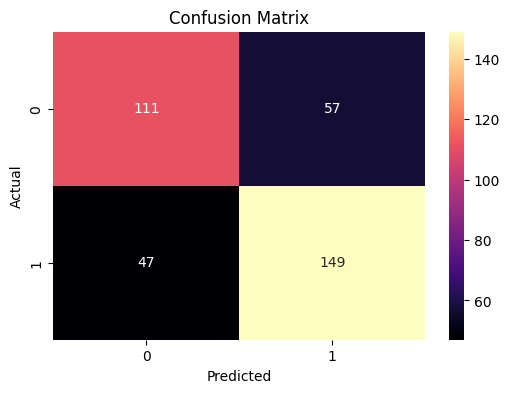

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


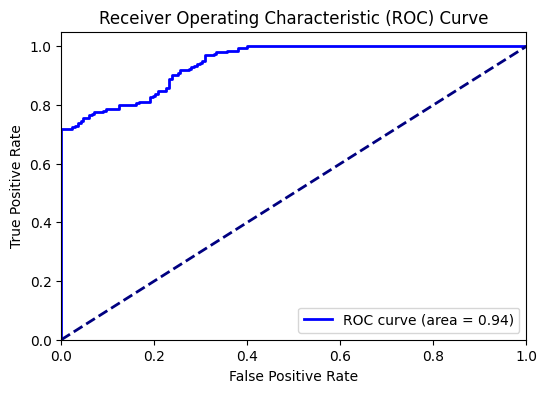

In [ ]:
#Here is the code for getting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
grf.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
grf.xlabel('Predicted')
grf.ylabel('Actual')
grf.title('Confusion Matrix')
grf.show()
ensemble=VotingClassifier(estimators=[('lr',best_logreg),('ada',best_ada_model),('lda',lda)],voting='soft')
ensemble.fit(X_train, y_train)
y_prob = ensemble.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)
#Here is the code for getting ROC Curve

grf.figure(figsize=(6, 4))
grf.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
grf.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
grf.xlim([0.0, 1.0])
grf.ylim([0.0, 1.05])
grf.xlabel('False Positive Rate')
grf.ylabel('True Positive Rate')
grf.title('Receiver Operating Characteristic (ROC) Curve')
grf.legend(loc="lower right")
grf.show()

In [ ]:
# Convert y_pred to a Pandas Series with the same index as X_test
y_pred_series = pd.Series(y_pred, index=X_test.index, name='Predicted_Label')

# Now you can merge
result_df = pd.merge(X_test, y_pred_series, left_index=True, right_index=True)
final_df = pd.merge(result_df,merged_df, on=['Adj Close','Volume'],how='inner')
final_df=final_df.drop(['Unnamed: 0','Unnamed: 7'],axis=1)
column1=['Open_x','Close','Predicted_Label','Label']
final_df=pd.DataFrame(final_df[column1])
print(final_df)

print(final_df)
drive.mount('drive', force_remount = True)

#Csv sheet is created to add these data in respective column and saved in drive

final_df.to_csv('final_meta.csv')
!cp final_meta.csv "drive/My Drive/"

         Open_x       Close  Predicted_Label  Label
0    187.199997  188.649994                0      1
1    264.519989  264.450012                1      0
2    134.690002  131.740005                0      0
3    184.839996  185.300003                1      1
4    151.720001  148.429993                0      0
..          ...         ...              ...    ...
359  165.720001  164.830002                1      0
360  271.239990  273.570007                1      1
361  193.369995  197.360001                0      1
362  180.509995  181.330002                1      1
363  191.360001  195.130005                0      1

[364 rows x 4 columns]
         Open_x       Close  Predicted_Label  Label
0    187.199997  188.649994                0      1
1    264.519989  264.450012                1      0
2    134.690002  131.740005                0      0
3    184.839996  185.300003                1      1
4    151.720001  148.429993                0      0
..          ...         ...             